# Problem 2

Given the function $$f(x) = \frac{x^4}{12} - \frac{xcos(8x)}{64}+\frac{sin(8x)}{256}$$

**(a) Calculate first and second derivative**

Upon calculation, we obtain:
$$f'=\frac{x \sin\left(8x\right)}{8} + \frac{\cos\left(8x\right)}{64} + \frac{x^{3}}{3}$$
$$f''=x \cos\left(8x\right) + x^{2}$$

**(b)**

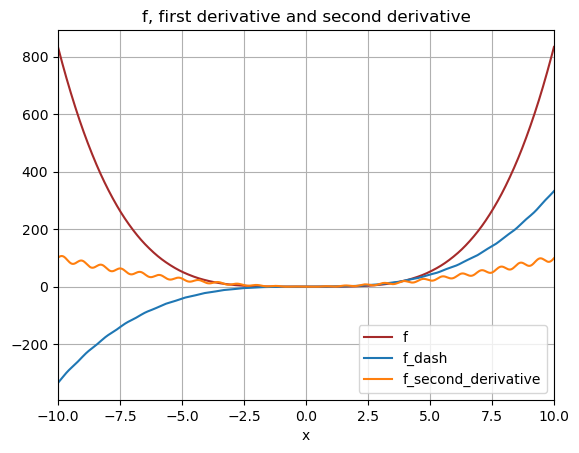

second derivative at 0.5 : -0.07682181043180597


In [56]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: np.sin(8*x)/256-(x*np.cos(8*x))/64+(x**4)/12
f_dash = lambda x: (x*np.sin(8*x))/8+np.cos(8*x)/64+(x**3)/3
f_second_derivative = lambda x: x*np.cos(8*x)+x**2

xs = np.linspace(-10, 10, 10000)
plt.grid()
plt.plot(xs, f(xs), label="f", color="brown")
plt.plot(xs, f_dash(xs), label="f_dash")

plt.plot(xs, f_second_derivative(xs), label = "f_second_derivative")
plt.gca().set_xlim([-10, 10])
plt.legend()
plt.xlabel("x")
plt.title('f, first derivative and second derivative')
plt.show()
print(f"second derivative at {0.5} : {f_second_derivative(0.5)}")

From the plot above, we see that the function is not convex. This is because, for some values of x, such as 0.5, the second derivative is less than $0$ as printed above

# Problem 3

$$\max_{x \in R^2} \frac{1}{\sqrt2}||v-x||$$
$$s.t ||x||=1$$

**(a)**

To state the geometric interpretation of the problem, we first note that $|x|=1$ which means that $x$ is a unit vector. 

The problem is asking for a value of $x$ that maximizes the distance between vector $x$ and an arbitrary vector $v$. 

If we place place both vectors $\bf{v}$ and $\bf{x}$ at the origin, then the values that $\bf{x}$ could take lie on the circle with the center at the origin and radius $\bf{|x|}$

Since $|v-x|$ is positive, then maximizing it is equivalent to maximizing its square. Therefore, a standard form for the problem is:

$$\min_{x \in R^2} \frac{1}{2}(-||v||^2+2v^Tx-||x||^2)$$
$$s.t. ||x||=1$$
Substituting |

Converged after 22 iterations.
Optimal t: 2.7830978983541765


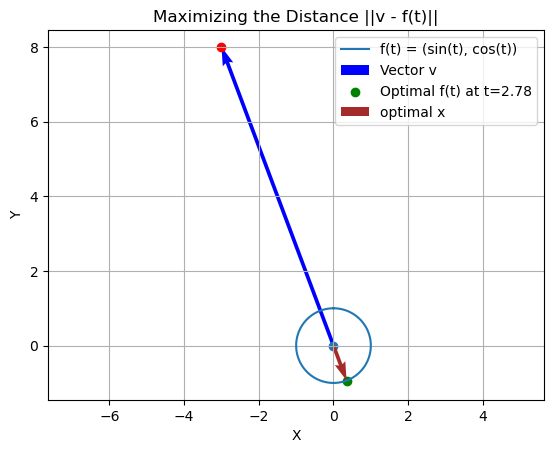

In [99]:
import matplotlib.pyplot as plt
from typing import Final
%matplotlib inline

def f(t): return np.array([np.sin(t), np.cos(t)])
    
def objective(t, v):
    """||v - f(t)||^2"""
    ft = f(t)
    return np.sum((v - ft)**2)


def gradient(t, v):
    grad_sin = 2 * (v[0] - np.sin(t)) * np.cos(t)  # derivative w.r.t. sin(t)
    grad_cos = 2 * (v[1] - np.cos(t)) * (-np.sin(t))  # derivative w.r.t. cos(t)
    return grad_sin + grad_cos

def gradient_descent(v, learning_rate=0.1, num_iterations=1000, tolerance=1e-6):

    t = np.random.rand() * 2 * np.pi 
    prev_objective = -1*objective(t, v)

    # Gradient descent loop
    for i in range(num_iterations):
        grad = gradient(t, v)
        t = t - learning_rate * grad  # Update step
        t = t % (2 * np.pi)

        # Checking for convergence
        current_objective = objective(t, v)
        if np.abs(current_objective - prev_objective) < tolerance:
            print(f"Converged after {i} iterations.")
            break
        prev_objective = current_objective

    return t

v: Final[np.array] = np.array([-3, 8])

optimal_t = gradient_descent(v, learning_rate=0.1, num_iterations=1000, tolerance=1e-6)


print(f"Optimal t: {optimal_t}")
t_values = np.linspace(0, 2 * np.pi, 100)
f_values = np.array([f(t) for t in t_values])

plt.plot(f_values[:, 0], f_values[:, 1], label='f(t) = (sin(t), cos(t))')
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector v')

plt.scatter(v[0], v[1], color='red')
plt.scatter(0,0)
optimal_f = f(optimal_t)
plt.scatter(optimal_f[0], optimal_f[1], color='green', label=f'Optimal f(t) at t={optimal_t:.2f}')
plt.quiver(0, 0, optimal_f[0], optimal_f[1], angles='xy', scale_units='xy', scale=1, color='brown', label='optimal x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Maximizing the Distance ||v - f(t)||')
plt.grid(True)
plt.axis('equal')
plt.show()
